# NetworkX
---

## 基本
---

- NetworkX Reference (https://networkx.github.io/documentation/latest/_downloads/networkx_reference.pdf)

### インストール

In [ ]:
$ pip install networkx

In [1]:
import networkx
networkx.__version__

'2.2'

### インポート

In [1]:
import networkx as nx
import numpy as np

### インスタンスの作成
---

Networkxには以下の４つのタイプのグラフがある
- Graph
    - 無向グラフ
    - 多重エッジは扱えない（但し，重みを付けることができる）
    - 自己ループは可

- DiGraph
    - 有向グラフ
    - 多重エッジは扱えない（但し，重みを付けることができる）
    
- MultiGrapg
    - 無向グラフ
    - 多重エッジ可
    
- MultiDiGraph
    - 有向グラフ
    - 多重エッジ可

In [3]:
G = nx.Graph()
DG = nx.DiGraph()
MG = nx.MultiGraph()
MDG = nx.MultiDiGraph()

Networkxでは，グラフの内部構造を隣接リストによって表す．これはPythonの辞書を用いて実現している．

### ノードの追加
---

In [4]:
DG.add_node(-1)
DG.add_nodes_from(np.arange(0,4)) #1〜5までのノードを追加
print(DG.node)

[-1, 0, 1, 2, 3]


In [5]:
# Hのノードを追加
H = nx.path_graph(10)  # １直線上に連なったグラフを作成
DG = nx.DiGraph()
DG.add_nodes_from(H)
print(DG.node)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
# Hを一つのノードとして追加
DG = nx.DiGraph()
DG.add_node(H)
print(DG.node)

### エッジの追加
---

In [7]:
# 1 -> 2にエッジを追加
G = nx.path_graph(3)
G.add_edge(1, 2)
G.edges

EdgeView([(0, 1), (1, 2)])

In [8]:
-1 in G.nodes()

False

In [9]:
# 2 -> 3に重み3のエッジを追加
G.add_edge(2, 3, weight=3)
print(G.edges)

[(0, 1), (1, 2), (2, 3)]


- 一度に複数のエッジを追加．ノードが存在しない場合は新たに追加される．

In [10]:
DG = nx.path_graph(3)
elist = [('a', 'b', 5), ('b', 'c', 3)]
DG.add_weighted_edges_from(elist)
print(DG.edges)

[(0, 1), (1, 2), ('a', 'b'), ('b', 'c')]


- ファイルから

In [11]:
x = np.loadtxt('edges.dat')
DG.add_weighted_edges_from(x)

OSError: edges.dat not found.

キーワードを指定することでエッジに属性を与えることができる．  
ただし，'weight'というキーワードは使えない．

In [13]:
DG.add_edge('a','b',weight=2,length=1.5)
DG['a']['b']['length']

1.5

- 多重有向グラフ（MultiDiGraph）の場合

In [14]:
DMG = nx.MultiDiGraph()
DMG.add_weighted_edges_from([(1,2,1), (1,2,3), (1,2,4)])
DMG.edges

OutMultiEdgeView([(1, 2, 0), (1, 2, 1), (1, 2, 2)])

- 隣接行列から変換

In [15]:
A = ar([[0, 1, 1, 0, 0], [1, 0, 1, 1, 0], [1, 1, 0, 1, 1], [0, 1, 1, 0, 0], [0, 0, 1, 0, 0]])
G = nx.from_numpy_matrix(A)

※ 注意
networkx組み込みの関数では，
    
    1 2
    1 2
    
というファイルを読み込んだ場合，(1,2)というエッジの重みが2にならない.  
networkx組み込みの関数を使う場合，

    1 2 2
    
のように，3列目に重みを指定する必要がある．  
しかし，わざわざ重みを指定したファイルを用意するのは面倒なので，次の関数を用意した。

    G.add_weighted_edges_ud()
    DG.add_weighted_edges_d()
    
これらは/usr/local/lib/python2.7/site-packages/networkx/classes内のdigraph.py,graph.pyの中に加えると使えるようになる．

※ "/Users/Narizuka/.pyenv/versions/2.7.13/lib/python2.7/site-packages/networkx/classes"

In [16]:
def add_weighted_edges_ud(self, ebunch, attr_dict=None, **attr):
    """
    Add all the edges in ebunch.
    If there is an edge, increment 'weight'.
    """
    # process ebunch
    for e in ebunch:
        ne =len(e)
        u,v = e
        if u not in self.node:
            self.adj[u] = {} 
            self.node[u] = {}
        if v not in self.node:
            self.adj[v] = {}
            self.node[v] = {}

        datadict=self.adj[u].get(v,{})
        if (datadict=={}):
            self.adj[u][v] = {'weight': 1}
            self.adj[v][u] = {'weight': 1}
        else:
            self.adj[u][v]['weight'] += 1
            self.adj[v][u]['weight'] += 1

In [17]:
def add_weighted_edges_d(self, ebunch, attr_dict=None, **attr):
    """
    Add all the edges in ebunch.
    If there is an edge, increment 'weight'.

    """
    # process ebunch
    for e in ebunch:
        ne = len(e)
        u, v = e
        if u not in self.succ:
            self.succ[u] = {}
            self.pred[u] = {}
            self.node[u] = {}
        if v not in self.succ:
            self.succ[v] = {}
            self.pred[v] = {}
            self.node[v] = {}

        datadict = self.adj[u].get(v, {})
        if (datadict=={}):
            self.succ[u][v] = {'weight': 1}
            self.pred[v][u] = {'weight': 1}
        else:
            self.succ[u][v]['weight'] += 1
            self.pred[v][u]['weight'] += 1

### ノード・エッジの削除
---

In [18]:
# ノードを削除
G = nx.path_graph(10)
G.remove_node(1)
G.remove_nodes_from([3,4,5])
print(G.node)

[0, 2, 6, 7, 8, 9]


In [20]:
# エッジを削除
G = nx.path_graph(10)
G.remove_edge(3,4)
G.remove_edges_from([(1,2), (5,6)])
print(G.edges)

[(0, 1), (2, 3), (4, 5), (6, 7), (7, 8), (8, 9)]


In [21]:
# グラフを削除
G = nx.path_graph(10)
G.clear()
G.node

NodeView(())

### ネットワーク情報の取得
---

In [22]:
np.random.randint(1, 6, 10)

array([2, 5, 1, 4, 4, 2, 5, 3, 5, 2])

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
DG = nx.DiGraph()
DG.add_nodes_from(np.arange(1, 6)) #1〜5までのノードを追加
# elist = [(0, 1), (1, 2)]
elist = np.c_[np.random.randint(1, 6, 20), np.random.randint(1, 6, 20)]
DG.add_edges_from(elist)
nx.draw_networkx(DG, pos=nx.circular_layout(DG))

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
G = nx.Graph()
G.add_nodes_from(np.arange(1, 3)) #1〜3までのノードを追加
# elist = [(0, 1), (1, 2)]
elist = [(1, 2), (2, 3)]
G.add_edges_from(elist)
nx.draw_networkx(G, pos=nx.circular_layout(G))

A = ar(nx.to_numpy_matrix(G))
k = np.array(G.degree())[:, 1]
A / np.tile(k, (3, 1)).T

#### 隣接行列の取得

In [25]:
ar(nx.to_numpy_matrix(DG))

array([[1., 1., 1., 0., 0.],
       [1., 1., 0., 0., 1.],
       [0., 0., 1., 1., 1.],
       [0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 1.]])

#### ノード数

In [27]:
G = nx.path_graph(10)
G.number_of_nodes()

10

#### エッジ数

In [28]:
G = nx.path_graph(10)
G.number_of_edges()

9

#### 次数
自己ループも無視されないので注意

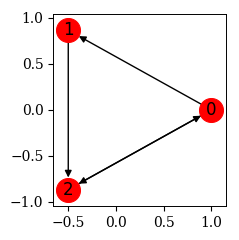

In [29]:
fig = plt.figure(figsize=(2.5, 2.5))
DG = nx.DiGraph()
elist = [[0,1,3], [0,2,2], [1,2,2], [2, 0, 2], [0, 0, 1], [1, 1, 2]]
DG.add_weighted_edges_from(elist)
A = ar(nx.to_numpy_matrix(DG))
nx.draw_networkx(DG, pos=nx.circular_layout(DG))

In [30]:
dict(DG.degree(weight=None))

{0: 5, 1: 4, 2: 3}

In [31]:
dict(DG.degree(weight='weight'))  # weightの和

{0: 9, 1: 9, 2: 6}

In [32]:
# 特定のノード
DG.degree(0, 'weight')

9

#### クラスタ係数

In [33]:
G = nx.Graph()
G.add_edges_from([[1,2], [2, 3], [3,1]])
nx.clustering(G)

{1: 1.0, 2: 1.0, 3: 1.0}

#### グラフ同型の判定

In [34]:
G = nx.complete_bipartite_graph(2,2) # 完全2部グラフ
H = nx.cycle_graph(4) # 閉路グラフ

print(nx.is_isomorphic(G, H))

True


### サイクルの検出
Returns a list of cycles which form a basis for cycles of G.
A basis for cycles of a network is a minimal collection of cycles such that any cycle in the network can be written as a sum of cycles in the basis. Here summation of cycles is defined as “exclusive or” of the edges. Cycle bases are useful, e.g. when deriving equations for electric circuits using Kirchhoff’s Laws.

- https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.cycles.cycle_basis.html#networkx.algorithms.cycles.cycle_basis

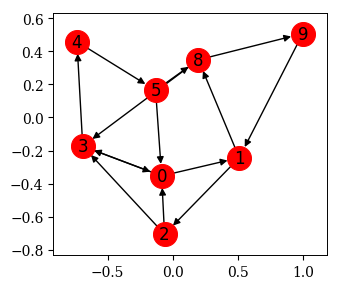

In [35]:
G=nx.DiGraph()
G.add_cycle([0,1,2,3])
G.add_cycle([0,3,4,5])
G.add_cycle([0,1,2])
G.add_cycle([1,8,9])
G.add_cycle([3,4,5,8])
nx.draw_networkx(G)

In [40]:
list(nx.simple_cycles(G))

[[0, 3, 4, 5, 8, 9, 1, 2],
 [0, 3, 4, 5],
 [0, 3],
 [0, 1, 8, 3, 4, 5],
 [0, 1, 8, 3],
 [0, 1, 2],
 [0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3],
 [1, 8, 9],
 [1, 2, 3, 4, 5, 8, 9],
 [8, 3, 4, 5]]

In [ ]:
cycle_basis(G, 1)

In [38]:
def cycle_basis(G, root=None):
    
    gnodes=set(G.nodes())
    C = []
    while gnodes:  # gnodesが空[]になるまで繰り返す
        if root is None:
            root=gnodes.pop()     # gnodesの最初の要素を取り出す
        
        N0 = [root]                             # 　サイクルの起点となるノードのリスト
        pre = {root: root}                  #  {n: a}: nを含むパスでnの1つ前のノードがaである（a -> nというパスが存在）
        n0_used = {root: set()}       #  {n: {a, b, ...}}: nから始まるパスで， n->a, n->bというパスを既に調べた
        
        # N0が空[]になるまで繰り返す
        while N0: 
            n0=N0.pop() 
            n1_used = n0_used[n0]   # {b1, b2, ...}: n0の隣接ノードのうち既に調べたノード
            
            # n0の隣接ノードを順に調べる
            for n1 in G[n0]:
                
                if n1 not in n0_used:    # n1を起点とするサイクルが未調査
                    
                    N0.append(n1)         # n1をサイクルの起点ノードに追加
                    pre[n1] = n0             # n1の1つ前のノード
                    n0_used[n1] = set([n0])    # n1を起点とするパスでn1->n0を調べた
                    
                elif n1 == n0:        # 自己ループ
                    C.append([n0])
                    
                elif n1 not in n1_used:  # n0->n1をまだ調べてない
                    c = [n1, n0]
                    p=pre[n0]
                    
                    while p not in n0_used[n1]:
                        c.append(p)
                        p=pre[p]
                    c.append(p)
                    C.append(c)
                    n0_used[n1].add(n0)
        
        gnodes-=set(pre)
        root=None
    return C

### 描画

In [1]:
import matplotlib.pyplot as plt

In [4]:
G = nx.path_graph(10)

In [ ]:
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(3,2))
nx.draw_random(G, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(3,2))
nx.draw_circular(G)

In [ ]:
fig, ax = plt.subplots(figsize=(3,2))
nx.draw_spectral(G)

#### 様々な描画

- オプション：https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html

- ノードの位置を指定：http://sinhrks.hatenablog.com/entry/2014/12/27/232506

In [9]:
x = [1, 2]
y = ['first', 'second']
dict(zip(x, y))

{1: 'first', 2: 'second'}

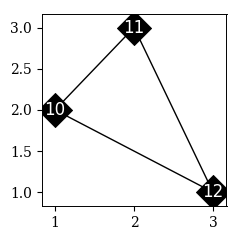

In [10]:
# 各ノードの描画位置を指定する辞書 { ノードのキー : (x座標, y座標) }
fig, ax = plt.subplots(figsize=(2.5, 2.5))
G = nx.Graph()
G.add_edges_from([[0, 2], [2, 1], [0, 1]])
xy = ar([[1,2], [2, 3], [3, 1]])
pos = {n: (xy[n][0], xy[n][1]) for n in G.nodes()}  # ノードの座標
la = {n: n+10 for n in G.nodes()}                   # ノードのラベル
nx.draw_networkx(G, ax=ax, pos=pos, node_size=300, node_shape='D',\
                 node_color='k', font_color='w', labels=la)

### Graphviz

- 参考
    - http://tessy.org/wiki/index.php?Graphviz%A5%E1%A5%E2
    - https://graphviz.readthedocs.io/en/stable/api.html    
    - https://qiita.com/rubytomato@github/items/51779135bc4b77c8c20d

- インストール
    
        pip install graphviz
        pip install pygraphviz

In [11]:
import graphviz as gv

G = gv.Digraph(format="png") # 有向グラフ初期化
G.attr('node', shape='circle') # ノードの形

G.node("A","B") # ノード作成

N =  1  # ノード数
for i in range(N):
    G.node("boss"+str(i),"A") 
    G.edge("boss"+str(i), "B" ) # edge(元, 先) で線をつなぐ

print(G)
G.render('/Users/Narizuka/Desktop/test') # 画像作成

digraph {
	node [shape=circle]
	A [label=B]
	boss0 [label=A]
	boss0 -> B
}


'/Users/Narizuka/Desktop/test.png'

### グラフの生成
---

#### ランダムグラフ

- Erdos Renyi

In [ ]:
G = nx.erdos_renyi_graph(10, 0.5)  # p=0.5
nx.draw(G)

## コミュニティ検出
---

- https://networkx.github.io/documentation/stable/reference/algorithms/community.html

### 空手クラブネットワークの生成

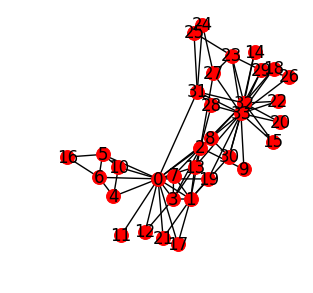

In [16]:
from networkx.algorithms import community
G = nx.karate_club_graph()
fig = plt.figure(figsize=(2.5, 2.5))
la = {n: n for n in G.nodes()}   
nx.draw(G, node_size=100, labels=la)

### エッジの媒介中心性による方法
---
- M. Girvan and M. E. J. Newman, PNAS 99, 7821, 2002.
- M. E. J. Newman and M. Girvan, PRE 69, 026113, 2004.

In [17]:
# 最初
import itertools
comp = community.girvan_newman(G)
k_max, C, Q = len(G.nodes()), [], []
for c in itertools.islice(comp, k_max):
    C.append(sorted(c))
    Q.append([len(c), community.modularity(G, c)])
Q = ar(Q)

In [18]:
# モジュラリティ最大となるコミュニティ数
Q[Q[:, 1]==Q[:, 1].max()][0]

array([5.        , 0.40129849])

### モジュラリティ最大化（貪欲法）
---
- A. Clauset, M.E.J. Newman, C. Moore, PRE 70, 066111, 2004.

※重み付きの場合は実装されていない
- https://stackoverflow.com/questions/52408739/networkx-calculate-a-a-good-partition-and-modularity-of-it

In [19]:
from networkx.algorithms.community import greedy_modularity_communities

In [20]:
C = greedy_modularity_communities(G, weight=None)
C

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

In [21]:
C = {i: sorted(c) for (i, c) in enumerate(C)}
C

{0: [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
 1: [1, 2, 3, 7, 9, 12, 13, 17, 21],
 2: [0, 4, 5, 6, 10, 11, 16, 19]}

In [22]:
# モジュラリティを計算
nx.algorithms.community.modularity(G, C.values())

0.3806706114398417

### infomap
---
networkxでは実装されていないので，以下をインストールする
- http://www.mapequation.org/code.html#Examples-with-python

- zipファイル，またはgithubからcloneして，適当な場所に展開する．
- 展開したフォルダに移動して，　makeする．

### GMLフォーマットでの出力
---

In [62]:
nx.write_gml(G, '/Users/Narizuka/Desktop/karate.gml')

# iGraph
---

## 基礎

### インストール

    brew install igraph
    brew install cairo --use-clang
    pip install python-igraph
    pip install pycairo
    pip install cairocffi

以下から__init__.pyをダウンロードする
- https://github.com/igraph/python-igraph/blob/8864b46849b031a3013764d03e167222963c0f5d/igraph/drawing/__init__.py

"/Users/Narizuka/.pyenv/versions/3.6.1/lib/python3.6/site-packages/igraph/drawing/__init__.py"と置き換える

### 基本的な使い方
- マニュアル：https://media.readthedocs.org/pdf/python-igraph/latest/python-igraph.pdf
- https://qiita.com/scapegoat_11_/items/d99cbcfea053d9fcd8d2

### 例

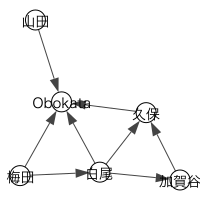

In [24]:
import igraph as ig
vertices = ["梅田", "白尾", "山田", "久保", "加賀谷", "Obokata"]
edges = [(0,1),(1,3),(1,4),(1,5),(2,5),(3,5),(4,3),(0,5)]
g = ig.Graph(vertex_attrs={"label": vertices}, edges=edges, directed=True)
ig.plot(g, vertex_size=20, bbox=(200, 200),vertex_color='white')

In [25]:
g = ig.Graph()

In [26]:
# ノードを3個追加
g.add_vertices(3)

In [27]:
# ノードの'name'属性を指定してさらに7個追加
g.add_vertices(['0', '1', '2', '3', '4', '7', '8'])

In [28]:
# ノードリスト
print(g.vs['name'])
print(g.vs.indices)

[None, None, None, '0', '1', '2', '3', '4', '7', '8']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [30]:
# ノードリスト（index）


In [31]:
# エッジの追加
g.add_edges([(0, 1), ('0', '1'), ('4', '7'), ('7', '8'), ('7', '8')])

In [37]:
# エッジリスト
g.get_edgelist()

[(0, 1), (3, 4), (7, 8), (8, 9), (8, 9)]

In [33]:
g.edge_attributes()

[]

In [ ]:
# エッジの重み
g.es['weight']

In [ ]:
# 重みリスト
g.es['weight']

In [ ]:
# エッジのid（追加した順番にidが付く）
g.get_eid(4, 2)

In [38]:
# ノードを削除
g.delete_vertices(1)

In [39]:
# idで指定してエッジを削除
g.delete_edges(0)

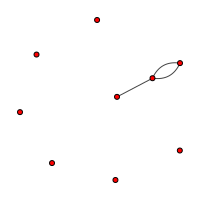

In [40]:
ig.plot(g, vertex_size=5, bbox=(200, 200))

In [41]:
g2 = ig.Graph.Tree(127, 2)

### gmlファイルから読み込み

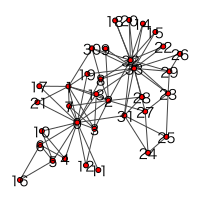

In [42]:
# networkxで空手クラブネットワークを保存
import networkx as nx
G = nx.karate_club_graph()
nx.write_gml(G, '/Users/Narizuka/Desktop/karate.gml')

# igraphで読み込み
g = ig.Graph.Read_GML('/Users/Narizuka/Desktop/karate.gml')
ig.plot(g, vertex_size=5, bbox=(200, 200))

### コミュニティ検出
---

In [44]:
g.es['w'] = np.random.randint(0, 10, len(g.vs))

In [45]:
dedr = ig.Graph.community_fastgreedy(g, weights='w')
C, Q = {}, []
for n in np.arange(2, len(g.vs)+1):
    c = dedr.as_clustering(n=n).membership
    C[n] = c
    Q.append([n, g.modularity(c)])
Q = ar(Q)

In [46]:
# モジュラリティ最大となるコミュニティ数
Q[Q[:, 1]==Q[:, 1].max()][0]

array([4.        , 0.41740631])